In [ ]:
from gda import gd_random  # descenso gradiente naıve con direccion de descenso aleatoria
from gdstep import gd_steepest  # descenso maximo naıve
from newton import newton_method  # descenso grediente de Newton, con Hessiano exacto
from nlcg import nonlinear_cg  # un metodo de gradiente conjugado (Fletcher-Reeves, Hestenes-Stiefel, Polak-Ribiere)
from bfgs import bfgs #  el método BFGS
import numpy as np

# a)

In [2]:
def f_xy(x):
    x1, y1 = x
    return x1**4 + y1**4 - 4*x1*y1 + 0.5*y1 + 1.0

def df_xy(x):
    x1, y1 = x
    dfx = 4*x1**3 - 4*y1
    dfy = 4*y1**3 - 4*x1 + 0.5
    return np.array([dfx, dfy], float)

def ddf_xy(x):
    x1, y1 = x
    return np.array([[12*x1**2, -4.0],
                     [-4.0,      12*y1**2]], float)

In [3]:
starts = [np.array([-3.0, 1.0])]

tol = 1e-6
maxIter = 20000
stop = "grad_norm"   # 'grad_norm' | 'step_norm' | 'f_change'
prt = 1
x0 = starts[0]

In [4]:
from utils import norm

results = {}
results["GD random"] = gd_random(f_xy, df_xy, x0, 1e-3, tol=tol, maxIter=maxIter, stop=stop, seed=0)
results["Steepest"]  = gd_steepest(f_xy, df_xy, x0, 1e-3, tol=tol, maxIter=maxIter, stop=stop)
results["Newton"]    = newton_method(f_xy, df_xy, ddf_xy, x0, 0.1, tol=tol, maxIter=500, stop=stop)
results["CG (PR+)"]  = nonlinear_cg(f_xy, df_xy, x0, 1e-3, tol=tol, maxIter=maxIter, stop=stop, formula="PR")
results["BFGS"]      = bfgs(f_xy, df_xy, x0, 1e-2, tol=tol, maxIter=maxIter, stop=stop)

print("Resumen (x*, f(x), ||g||, iters, conv):")
for name, (xbest, xs, fxs, errs, it, cv) in results.items():
    gnorm = norm(df_xy(xbest))
    print(f"{name:10s}  x={xbest}  f={f_xy(xbest): .6f}  ||g||={gnorm:.2e}  iters={it}  conv={cv}")

Resumen (x*, f(x), ||g||, iters, conv):
GD random   x=[-1.01474337 -1.04392265]  f=-1.511317  ||g||=9.25e-03  iters=20000  conv=0
Steepest    x=[-1.01462835 -1.04453034]  f=-1.511319  ||g||=9.94e-07  iters=2187  conv=1
Newton      x=[-1.01462847 -1.0445305 ]  f=-1.511319  ||g||=9.89e-07  iters=306  conv=1
CG (PR+)    x=[-1.01462835 -1.04453034]  f=-1.511319  ||g||=9.94e-07  iters=2187  conv=1
BFGS        x=[-1.01462836 -1.04453042]  f=-1.511319  ||g||=1.00e-06  iters=15948  conv=1


In [5]:
xx = np.linspace(-2.2, 1.6, 300)
yy = np.linspace(-2.0, 1.4, 300)
X, Y = np.meshgrid(xx, yy)
Z = X**4 + Y**4 - 4*X*Y + 0.5*Y + 1.0

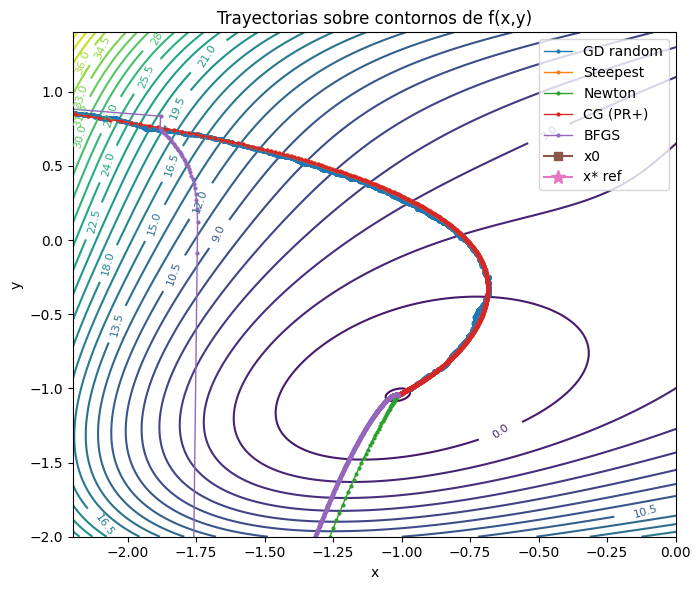

In [6]:
import matplotlib.pyplot as plt

x_star_ref = starts[0]

xx = np.linspace(-2.2, 1.6, 300)
yy = np.linspace(-2.0, 1.4, 300)
X, Y = np.meshgrid(xx, yy)
Z = X**4 + Y**4 - 4*X*Y + 0.5*Y + 1.0

plt.figure(figsize=(7,6))
CS = plt.contour(X, Y, Z, levels=30)
plt.clabel(CS, inline=1, fontsize=8)
for name, (_, xs, _, _, _, _) in results.items():
    arr = np.vstack(xs)
    plt.plot(arr[:,0], arr[:,1], marker='o', linewidth=1, markersize=2, label=name)
plt.plot([x0[0]],[x0[1]], marker='s', markersize=6, label="x0")
plt.plot([x_star_ref[0]],[x_star_ref[1]], marker='*', markersize=10, label="x* ref")
plt.title("Trayectorias sobre contornos de f(x,y)")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(loc="best"); plt.tight_layout()
plt.xlim(-2.2, 0)
plt.ylim(-2.0, 1.4)
plt.show()